In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [106]:
#feature engineering v1: mapp data to numerical without one-hot encoding
data = pd.read_excel('data_new.xlsx')
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date,DateClaimed,Date_Diff
0,12,5,3,Honda,Urban,2,1,1,Female,Single,...,No,External,none,1 year,3 to 4,1994,Liability,1994-12-29,1994-01-05,-358
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,No,External,none,no change,1 vehicle,1994,Collision,1994-01-20,1994-01-25,5
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,No,External,none,no change,1 vehicle,1994,Collision,1994-10-29,1994-11-11,13
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-12,1994-07-02,20
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,No,External,none,no change,1 vehicle,1994,Collision,1994-02-01,1994-02-09,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,11,4,5,Toyota,Urban,2,11,5,Male,Married,...,No,External,none,no change,1 vehicle,1996,Collision,1996-11-23,1996-12-04,11
15415,11,5,4,Pontiac,Urban,5,12,1,Male,Married,...,No,External,more than 5,no change,3 to 4,1996,Liability,1996-11-29,1996-12-07,8
15416,11,5,4,Toyota,Rural,5,12,1,Male,Single,...,No,External,1 to 2,no change,1 vehicle,1996,Collision,1996-11-29,1996-12-07,8
15417,12,1,1,Toyota,Urban,4,12,2,Female,Married,...,No,External,more than 5,no change,1 vehicle,1996,All Perils,1996-12-03,1996-12-13,10


In [107]:
VehiclePrice_mapping = {
    'more than 69000': np.mean([69000, 100000]),          # OR [69000,float(inf)]
    '20000 to 29000': np.mean([20000, 29000]),
    '30000 to 39000': np.mean([30000, 39000]),
    'less than 20000': np.mean([0, 20000]),
    '40000 to 59000': np.mean([40000, 59000]),
    '60000 to 69000': np.mean([60000, 69000])
}
data['VehiclePrice'] = data['VehiclePrice'].map(VehiclePrice_mapping)

Days_Policy_Accident_mapping = {
    'more than 30': np.mean([30, 50]),
    '15 to 30': np.mean([15, 30]),
    'none': 0,
    '1 to 7': np.mean([1, 7]),
    '8 to 15': np.mean([8, 15])
}
data['Days_Policy_Accident'] = data['Days_Policy_Accident'].map(Days_Policy_Accident_mapping)

Days_Policy_Claim_mapping = {
    'more than 30': np.mean([30, 50]),
    '15 to 30': np.mean([15, 30]),
    '8 to 15': np.mean([8, 15]),
    'none': 0
}
data['Days_Policy_Claim'] = data['Days_Policy_Claim'].map(Days_Policy_Claim_mapping)

PastNumberOfClaims_mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': np.mean([2, 4]),
    'more than 4': 5
}
data['PastNumberOfClaims'] = data['PastNumberOfClaims'].map(PastNumberOfClaims_mapping)

AgeOfVehicle_mapping = {
    '3 years': 3,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8,
    '5 years': 5,
    'new': 1,
    '4 years': 4,
    '2 years': 2
}
data['AgeOfVehicle'] = data['AgeOfVehicle'].map(AgeOfVehicle_mapping)

AgeOfPolicyHolder_mapping = {
    '26 to 30': np.mean([26, 30]),
    '31 to 35': np.mean([31, 35]),
    '41 to 50': np.mean([41, 50]),
    '51 to 65': np.mean([51, 65]),
    '21 to 25': np.mean([21, 25]),
    '36 to 40': np.mean([36, 40]),
    '16 to 17': np.mean([16, 17]),
    'over 65': np.mean([65, 75]),
    '18 to 20': np.mean([18, 20])
}
data['AgeOfPolicyHolder'] = data['AgeOfPolicyHolder'].map(AgeOfPolicyHolder_mapping)

NumberOfSuppliments_mapping = {
    'none': 0,
    'more than 5': 6,
    '3 to 5': np.mean([3, 5]),
    '1 to 2': np.mean([1, 2])
}
data['NumberOfSuppliments'] = data['NumberOfSuppliments'].map(NumberOfSuppliments_mapping)

AddressChange_Claim_mapping = {
    '1 year': 1,
    'no change': 0,
    '4 to 8 years': np.mean([4, 8]),
    '2 to 3 years': np.mean([2, 3]),
    'under 6 months': np.mean([0, 0.5])
}
data['AddressChange_Claim']= data['AddressChange_Claim'].map(AddressChange_Claim_mapping)

NumberOfCars_mapping = {
    '3 to 4': np.mean([3, 4]),
    '1 vehicle': 1,
    '2 vehicles': 2,
    '5 to 8': np.mean([5, 8]),
    'more than 8': np.mean([8, 10])
}
data['NumberOfCars']= data['NumberOfCars'].map(NumberOfCars_mapping)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15419 non-null  int64         
 1   WeekOfMonth           15419 non-null  int64         
 2   DayOfWeek             15419 non-null  int64         
 3   Make                  15419 non-null  object        
 4   AccidentArea          15419 non-null  object        
 5   DayOfWeekClaimed      15419 non-null  int64         
 6   MonthClaimed          15419 non-null  int64         
 7   WeekOfMonthClaimed    15419 non-null  int64         
 8   Sex                   15419 non-null  object        
 9   MaritalStatus         15419 non-null  object        
 10  Age                   15419 non-null  int64         
 11  Fault                 15419 non-null  object        
 12  PolicyType            15419 non-null  object        
 13  VehicleCategory 

In [109]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date,DateClaimed,Date_Diff
0,12,5,3,Honda,Urban,2,1,1,Female,Single,...,No,External,0.0,1.0,3.5,1994,Liability,1994-12-29,1994-01-05,-358
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,No,External,0.0,0.0,1.0,1994,Collision,1994-01-20,1994-01-25,5
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,No,External,0.0,0.0,1.0,1994,Collision,1994-10-29,1994-11-11,13
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,No,External,6.0,0.0,1.0,1994,Liability,1994-06-12,1994-07-02,20
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,No,External,0.0,0.0,1.0,1994,Collision,1994-02-01,1994-02-09,8


In [110]:
data = data.drop(['Date', 'DateClaimed'], axis = 1)

In [112]:
#define a function for label encoding and scaling
def encodeNscale(df):
    scaler = StandardScaler()
    encoder = OneHotEncoder(sparse=False)

    ohe_cols = data.select_dtypes(include=['object']).columns
    df_encoded = pd.DataFrame(encoder.fit_transform(df[ohe_cols]), columns=encoder.get_feature_names_out(ohe_cols))
    df = pd.concat([df, df_encoded], axis=1)
    df = df.drop(ohe_cols, axis=1)

    scaled_col = list(df.columns)
    scaled_col.remove('FraudFound_P')
    scaled_ds = pd.DataFrame(scaler.fit_transform(df[scaled_col].copy()),columns= scaled_col)
    return scaled_ds

0.05007396953571297
[('Constant', 0.06), ('Month', -0.0), ('WeekOfMonth', -0.0), ('DayOfWeek', -0.0), ('DayOfWeekClaimed', 0.0), ('MonthClaimed', -0.0), ('WeekOfMonthClaimed', -0.0), ('Age', -0.0), ('VehiclePrice', 0.0), ('PolicyNumber', -0.0), ('RepNumber', -0.0), ('Deductible', 0.0), ('DriverRating', 0.0), ('Days_Policy_Accident', -0.0), ('Days_Policy_Claim', -0.0), ('PastNumberOfClaims', -0.0), ('AgeOfVehicle', -0.0), ('AgeOfPolicyHolder', -0.0), ('NumberOfSuppliments', -0.0), ('AddressChange_Claim', 0.0), ('NumberOfCars', 0.0), ('Year', -0.0), ('Date_Diff', -0.0), ('Make_Accura', 0.0), ('Make_BMW', 0.0), ('Make_Chevrolet', -0.0), ('Make_Dodge', -0.0), ('Make_Ferrari', -0.0), ('Make_Ford', 0.0), ('Make_Honda', 0.0), ('Make_Jaguar', -0.0), ('Make_Lexus', -0.0), ('Make_Mazda', -0.0), ('Make_Mecedes', 0.0), ('Make_Mercury', -0.0), ('Make_Nisson', -0.0), ('Make_Pontiac', -0.0), ('Make_Porche', -0.0), ('Make_Saab', 0.0), ('Make_Saturn', 0.0), ('Make_Toyota', -0.0), ('Make_VW', -0.0), ('A

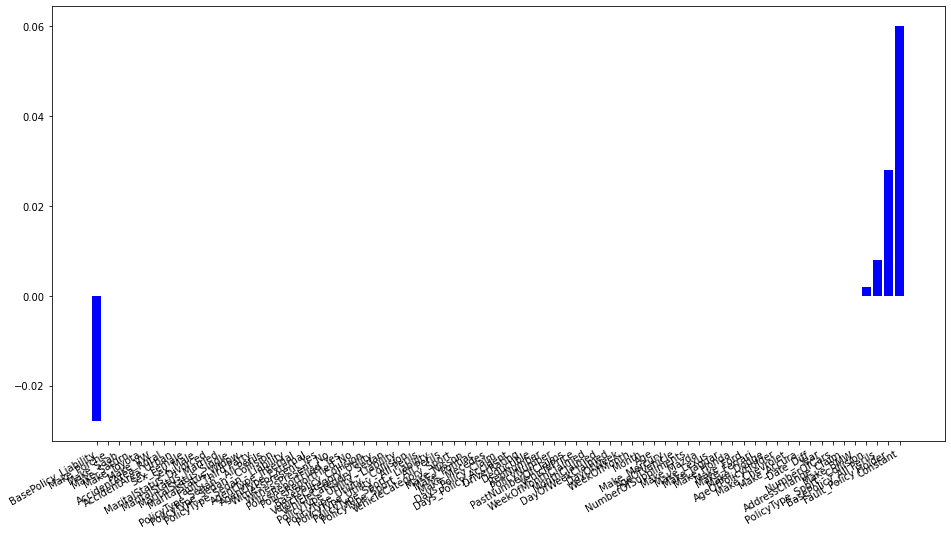

In [113]:
data_copy = data.copy()
y = data_copy['FraudFound_P']
X = encodeNscale(data_copy)

lm = Lasso(alpha=0.01)
lm.fit(X,y)
y_pred = lm.predict(X)
print(r2_score(y_true=y,y_pred=y_pred))

model_parameter = list(lm.coef_)
model_parameter.insert(0, lm.intercept_)

model_parameter = [round(x, 3) for x in model_parameter]

col = list(X.columns)
col.insert(0, 'Constant')

parameter_summary = list(zip(col, model_parameter))
print(parameter_summary)
index = np.argsort(model_parameter)
col, model_parameter = np.array(col)[index], np.array(model_parameter)[index]

plt.figure(figsize=(16, 8))
plt.bar(np.arange(len(col)), model_parameter, color='blue')
plt.xticks(np.arange(len(col)), col, rotation=30, ha='right')
plt.show()

In [77]:
values, counts = np.unique(y, return_counts=True)
print(values)
counts

[0 1]


array([14496,   923])

In [78]:
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date_Diff
0,12,5,3,Honda,Urban,2,1,1,Female,Single,...,28.0,No,No,External,0.0,1.0,3.5,1994,Liability,-358
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,33.0,Yes,No,External,0.0,0.0,1.0,1994,Collision,5
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,45.5,No,No,External,0.0,0.0,1.0,1994,Collision,13
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,58.0,Yes,No,External,6.0,0.0,1.0,1994,Liability,20
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,33.0,No,No,External,0.0,0.0,1.0,1994,Collision,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,11,4,5,Toyota,Urban,2,11,5,Male,Married,...,33.0,No,No,External,0.0,0.0,1.0,1996,Collision,11
15415,11,5,4,Pontiac,Urban,5,12,1,Male,Married,...,33.0,No,No,External,6.0,0.0,3.5,1996,Liability,8
15416,11,5,4,Toyota,Rural,5,12,1,Male,Single,...,28.0,No,No,External,1.5,0.0,1.0,1996,Collision,8
15417,12,1,1,Toyota,Urban,4,12,2,Female,Married,...,33.0,No,No,External,6.0,0.0,1.0,1996,All Perils,10


In [79]:
#split X, y & train, validation, test
df = encodeNscale(data)
df['FraudFound_P'] = data['FraudFound_P']
data = df

#check if y is unbalanced
values, counts = np.unique(y, return_counts=True)
print(values)
print(counts)
#downsample to upweight observations where y = 1
data_y0 = data[data['FraudFound_P'] == 0][::10]
data_y1 = data[data['FraudFound_P'] == 1]
data_new = pd.concat([data_y0, data_y1])
data_new
values, counts = np.unique(data_new['FraudFound_P'], return_counts=True)
print(values)
print(counts)

y = data_new['FraudFound_P']
X = data_new.drop(['FraudFound_P'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

[0 1]
[14496   923]
[0 1]
[1450  923]


In [83]:
#Baseline SVM
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
train_accuracy = svc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
test_accuracy = svc.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, svc.predict(X_test)))


Training Accuracy: 0.803030303030303
Testing Accuracy: 0.6905263157894737
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       304
           1       0.55      0.79      0.65       171

    accuracy                           0.69       475
   macro avg       0.70      0.71      0.69       475
weighted avg       0.74      0.69      0.70       475



In [84]:
#Grid-search for parameter tuning
kernel = ['linear','rbf','poly','sigmoid']
C = [0.1, 1, 10, 20]

for k in kernel:
    for c in C:
        svc = SVC(kernel=k, probability=True, random_state=42, C=c)
        svc.fit(X_train, y_train)
        print("kernal: ", k)
        print("C: ", c)

        train_accuracy = svc.score(X_train, y_train)
        print("Training Accuracy:", train_accuracy)
        test_accuracy = svc.score(X_val, y_val)
        print("Validation Accuracy:", test_accuracy)
        print(classification_report(y_val, svc.predict(X_val)))


kernal:  linear
C:  0.1
Training Accuracy: 0.7476943346508564
Validation Accuracy: 0.7131578947368421
              precision    recall  f1-score   support

           0       0.91      0.59      0.72       235
           1       0.58      0.91      0.71       145

    accuracy                           0.71       380
   macro avg       0.75      0.75      0.71       380
weighted avg       0.79      0.71      0.71       380

kernal:  linear
C:  1
Training Accuracy: 0.7476943346508564
Validation Accuracy: 0.7131578947368421
              precision    recall  f1-score   support

           0       0.91      0.59      0.72       235
           1       0.58      0.91      0.71       145

    accuracy                           0.71       380
   macro avg       0.75      0.75      0.71       380
weighted avg       0.79      0.71      0.71       380

kernal:  linear
C:  10
Training Accuracy: 0.7476943346508564
Validation Accuracy: 0.7131578947368421
              precision    recall  f1-score

In [91]:
#run SVM with the best parameters: kernel = sigmoid, C = 1 (if focus on recall)
svm = SVC(kernel='sigmoid', probability=True, random_state=42, C=1)
svm.fit(X_train, y_train)
train_accuracy = svc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
test_accuracy = svc.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)
print(classification_report(y_test, svc.predict(X_test)))
#performs worse off than baseline model

Training Accuracy: 0.6324110671936759
Testing Accuracy: 0.6505263157894737
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       304
           1       0.51      0.58      0.55       171

    accuracy                           0.65       475
   macro avg       0.63      0.64      0.63       475
weighted avg       0.66      0.65      0.65       475



In [92]:
#Adjust threshold using Youden's Index
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_val_pred = svm.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred[:, 1])
j_score = tpr-fpr
optimal_threshold = thresholds[np.argmax(j_score)]
print("Youden's Index:", max(j_score))
print("thresholds:", optimal_threshold)

y_test_pred = svm.predict_proba(X_test)
preds = np.where(y_test_pred[:, 1]>optimal_threshold, 1, 0)
test_accuracy = accuracy_score(y_test, preds)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, preds))

#recall and f1-score improved compared to baseline model

Youden's Index: 0.5267791636096846
thresholds: 0.2584772968802931
Test Accuracy: 0.6694736842105263
              precision    recall  f1-score   support

           0       0.89      0.55      0.68       304
           1       0.52      0.88      0.66       171

    accuracy                           0.67       475
   macro avg       0.71      0.72      0.67       475
weighted avg       0.76      0.67      0.67       475

